In [78]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [79]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [80]:
def cut_data(rr, dedx):
    print(ak.count(rr))
    
    rr= ak.flatten(rr)
    dedx= ak.flatten(dedx)

    remove= np.where((rr>25)|(dedx>25))
    rr= np.delete(rr, remove)
    dedx= np.delete(dedx, remove)

    return rr.to_numpy(), dedx.to_numpy()

In [81]:
rr_1= file1['rec.reco.trk.calo.2.points.rr'].array()
dedx_1= file1['rec.reco.trk.calo.2.points.dedx'].array()
c_mu= file1['rec.reco.trk.chi2pid.2.chi2_muon'].array()
#================================================================================
rr_2= file2['rec.reco.trk.calo.2.points.rr'].array()
dedx_2= file2['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================  
rr_3= file3['rec.reco.trk.calo.2.points.rr'].array()
dedx_3= file3['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
rr_4= file4['rec.reco.trk.calo.2.points.rr'].array()
dedx_4= file4['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
rr_5= file5['rec.reco.trk.calo.2.points.rr'].array()
dedx_5= file5['rec.reco.trk.calo.2.points.dedx'].array()

305275
322627
333812
322409
332170


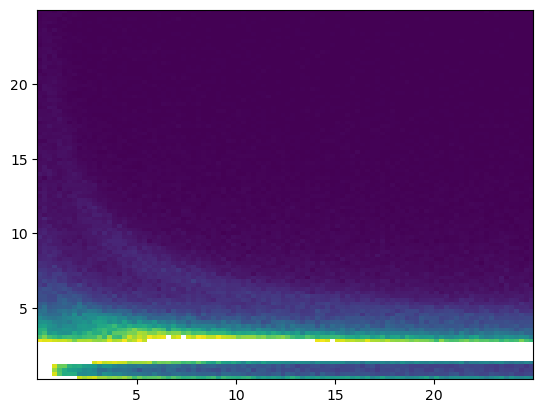

In [82]:
rr_1, dedx_1= cut_data(rr_1, dedx_1)
rr_2, dedx_2= cut_data(rr_2, dedx_2)
rr_3, dedx_3= cut_data(rr_3, dedx_3)
rr_4, dedx_4= cut_data(rr_4, dedx_4)
rr_5, dedx_5= cut_data(rr_5, dedx_5)


dedx= np.concatenate([dedx_1,dedx_2, dedx_3, dedx_4, dedx_5])
rr= np.concatenate([rr_1,rr_2, rr_3, rr_4, rr_5])

h,_,_,_= plt.hist2d(rr, dedx ,bins=(100,100), cmax=500)
for i, val in np.ndenumerate(h):
    if np.isnan(val):
        h[i]= round(np.random.normal(2,3))

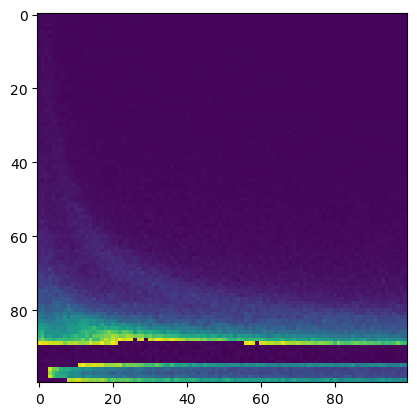

In [83]:
plt.imshow(np.flip(h.T, axis=0))